In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("data_penjualan_retail.csv")
df.head(3)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


- General Knowledge about the Dataset
- Exploratory Data Analysis & Preprocessing
- Customer Demographics and Behavior
- Product Analysis
- Sales and Revenue Trends
- Customer Engagement and Satisfaction
- Machine Learning to Predict next month sales

#### General Knowledge about the Dataset // Exploratory Data Analysis // Preprocessing

In [12]:
# Displaying general information about the dataset
print("=========================================================================================")
print("\nGeneral information about the dataset:")
print(df.info())

# Displaying the number of rows and columns in the dataset
print("=========================================================================================")
print("\nNumber of rows and columns in the dataset:")
print(df.shape)

# Displaying the list of columns (variables) in the dataset
print("=========================================================================================")
print("\nList of columns (variables) in the dataset:")
print(df.columns)

# Displaying descriptive statistics for numerical data
print("=========================================================================================")
print("\nDescriptive statistics for numerical data:")
print(df.describe())

# Displaying a summary for categorical data
print("=========================================================================================")
print("\nSummary for categorical data:")
print(df.describe(include=['object']))  # Include=['object'] for categorical variables

# Checking for missing values
print("=========================================================================================")
print("\nNumber of missing values per column:")
print(df.isnull().sum())

# Checking for duplicate values
print("=========================================================================================")
print("\nNumber of duplicated values:")
print(df.duplicated().sum())


General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non

#### Exploratory Data Analysis & Preprocessing
##### 1. Incorrect character encoding (float that supposed to be int or string to maintain accuracy).
##### 2. Lot of missing values (NaNs or blanks).
##### 3. Messy data, a lot of Customer having the same Customer_ID, Transaction_ID and Email

In [13]:
# Calculate the mean of 'Transaction_ID' and 'Customer_ID'
mean_transaction_id = df['Transaction_ID'].astype(float).mean()
mean_customer_id = df['Customer_ID'].astype(float).mean()
mean_zipcode = df['Zipcode'].astype(float).mean()

# Fill NaN values with the mean
df['Transaction_ID'].fillna(mean_transaction_id, inplace=True)
df['Customer_ID'].fillna(mean_customer_id, inplace=True)
df['Zipcode'] = df['Zipcode'].fillna(mean_zipcode)
df['Phone'].fillna(df['Phone'].astype(float).mean(), inplace=True)
df['Age'].fillna(df['Age'].astype(float).mean(), inplace=True)                   
df['Total_Purchases'].fillna(df['Total_Purchases'].astype(float).mean(), inplace=True)
df['Year'].fillna(df['Year'].astype(float).mean(), inplace=True)

# Convert 'Transaction_ID' and 'Customer_ID' to integers
df['Transaction_ID'] = df['Transaction_ID'].astype(int)
df['Customer_ID'] = df['Customer_ID'].astype(int)
df['Zipcode'] = df['Zipcode'].astype(int)
df['Phone'] = df['Phone'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Total_Purchases'] = df['Total_Purchases'].astype(int)
df['Year'] = df['Year'].astype(int)

In [14]:
#using interpolate for filling missing values with available values
df['Total_Purchases'] = df['Total_Purchases'].interpolate(direction='both')
df['Amount'] = df['Amount'].interpolate(direction='both')
df['Total_Amount'] = df['Total_Purchases'] * df['Amount']

In [15]:
# Fill null values in numerical columns with mean                                      
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill null values in categorical columns with mode                                      
categorical_cols = df.select_dtypes(include=['object']).columns                         
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

cat_columns = df.select_dtypes(include=['object']).columns
for col in cat_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [16]:
# Before removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)

# Keep only the first occurrence of each duplicated row and remove the rest so it was perfectly removed duplicates from df...
df.drop_duplicates(subset=['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status'], keep='first', inplace=True)

# After removing duplicates
print("Shape of DataFrame after removing duplicates:", df.shape)

Shape of DataFrame before removing duplicates: (302010, 30)
Shape of DataFrame after removing duplicates: (301917, 30)


In [17]:
# Displaying general information about the dataset
print("=========================================================================================")
print("\nGeneral information about the dataset:")
print(df.info())

# Displaying the number of rows and columns in the dataset
print("=========================================================================================")
print("\nNumber of rows and columns in the dataset:")
print(df.shape)

# Displaying the list of columns (variables) in the dataset
print("=========================================================================================")
print("\nList of columns (variables) in the dataset:")
print(df.columns)

# Displaying descriptive statistics for numerical data
print("=========================================================================================")
print("\nDescriptive statistics for numerical data:")
print(df.describe())

# Displaying a summary for categorical data
print("=========================================================================================")
print("\nSummary for categorical data:")
print(df.describe(include=['object']))  # Include=['object'] for categorical variables

# Checking for missing values
print("=========================================================================================")
print("\nNumber of missing values per column:")
print(df.isnull().sum())

# Checking for duplicate values
print("=========================================================================================")
print("\nNumber of duplicated values:")
print(df.duplicated().sum())


General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 301917 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301917 non-null  int32  
 1   Customer_ID       301917 non-null  int32  
 2   Name              301917 non-null  object 
 3   Email             301917 non-null  object 
 4   Phone             301917 non-null  int32  
 5   Address           301917 non-null  object 
 6   City              301917 non-null  object 
 7   State             301917 non-null  object 
 8   Zipcode           301917 non-null  int32  
 9   Country           301917 non-null  object 
 10  Age               301917 non-null  int32  
 11  Gender            301917 non-null  object 
 12  Income            301917 non-null  object 
 13  Customer_Segment  301917 non-null  object 
 14  Date              301917 non-null  object 
 15  Year              301917 non

### Customer Demographic and Behavior

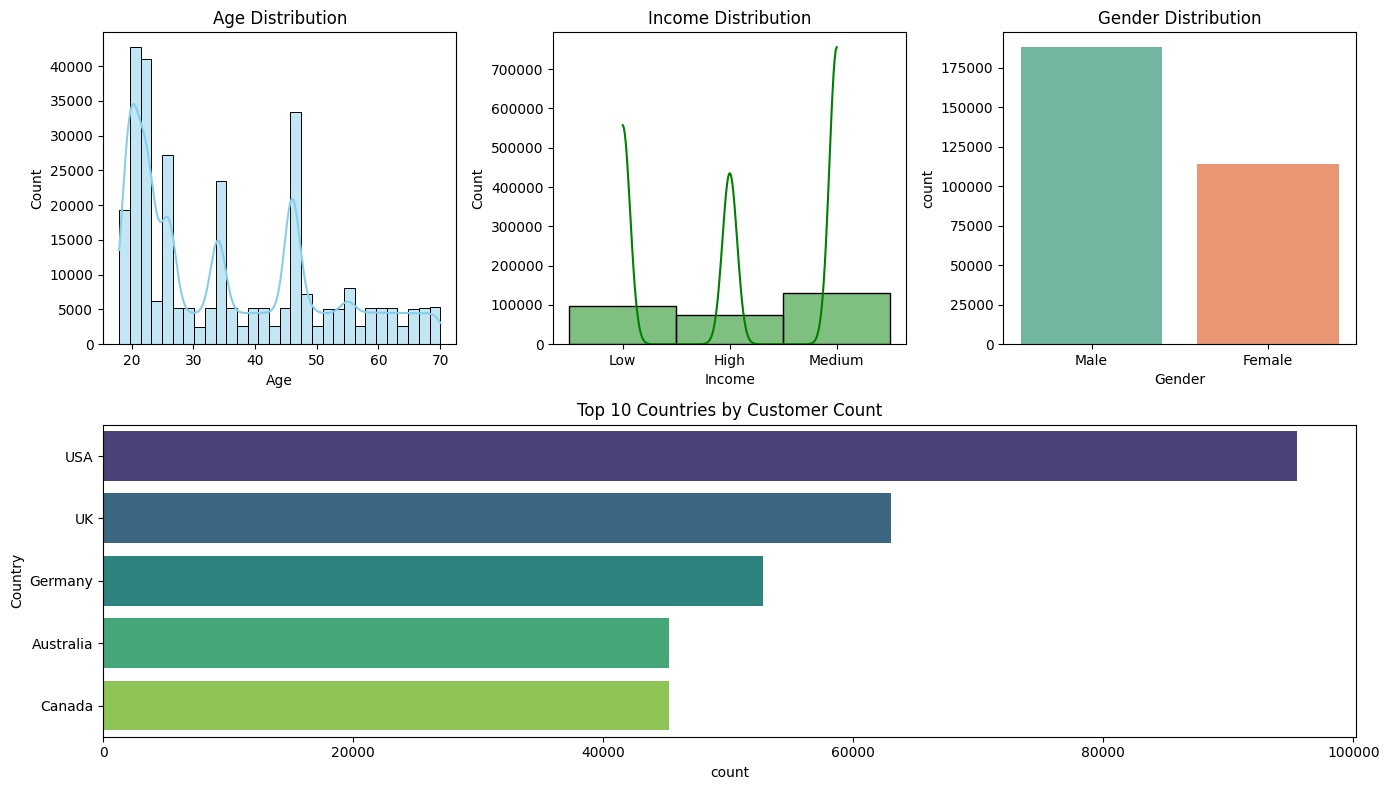

Summary Statistics for Age:
count    301917.000000
mean         35.477962
std          15.016770
min          18.000000
25%          22.000000
50%          32.000000
75%          46.000000
max          70.000000
Name: Age, dtype: float64

Summary Statistics for Income:
count     301917
unique         3
top       Medium
freq      130489
Name: Income, dtype: object

Gender Counts:
Male      187858
Female    114059
Name: Gender, dtype: int64


In [26]:
# Analyze customer demographics
customer_demographics = df[['Age', 'Gender', 'Income', 'City', 'State', 'Country']]

# Summary statistics for numerical demographics
age_stats = customer_demographics['Age'].describe()
income_stats = customer_demographics['Income'].describe()

# Gender distribution
gender_counts = customer_demographics['Gender'].value_counts()

# Visualization
plt.figure(figsize=(14, 8))

# Age distribution
plt.subplot(2, 3, 1)
sns.histplot(customer_demographics['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')

# Income distribution
plt.subplot(2, 3, 2)
sns.histplot(customer_demographics['Income'], bins=30, kde=True, color='green')
plt.title('Income Distribution')

# Gender distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Gender', data=customer_demographics, palette='Set2')
plt.title('Gender Distribution')

# Location distribution (City, State, Country)
plt.subplot(2, 1, 2)
sns.countplot(y='Country', data=customer_demographics, palette='viridis', order=customer_demographics['Country'].value_counts().index[:10])
plt.title('Top 10 Countries by Customer Count')

plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary Statistics for Age:")
print(age_stats)
print("\nSummary Statistics for Income:")
print(income_stats)
print("\nGender Counts:")
print(gender_counts)


- Age Distribution ranging from 10 Years Old all the way to 70 Years
- Highest Income Distribution is Medium followed by Low and High
- Gender DIstribution dominated by Male with almost 200.000 users and 115.000 Female Users.
- Country with the Highest users is USA followed by UK, Gemany, Australia and Canada.

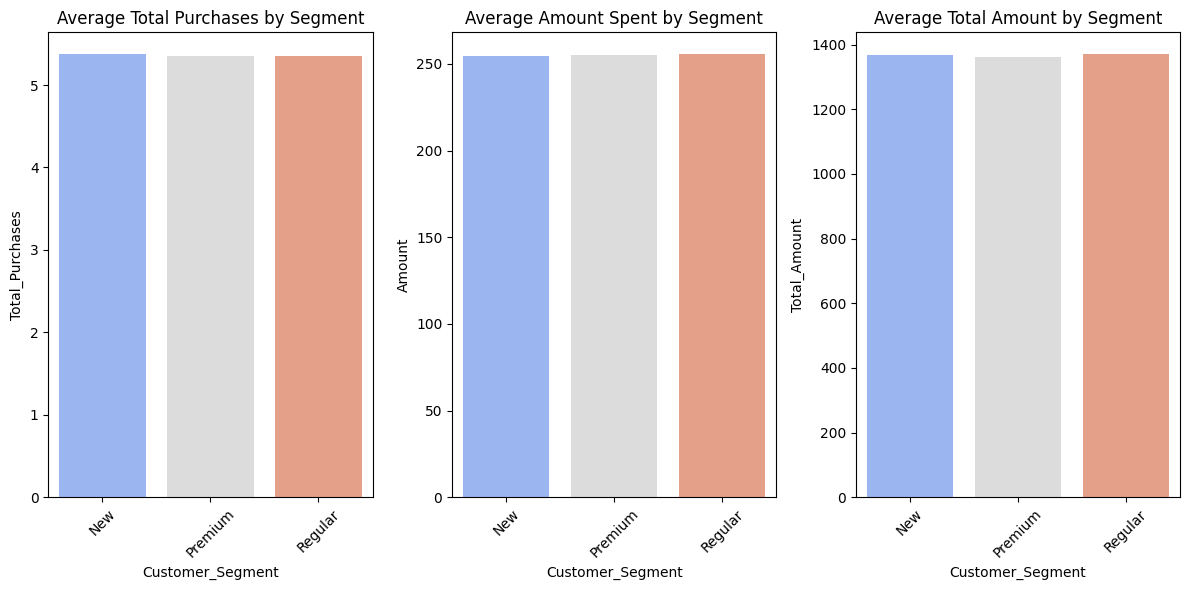

Segment-wise Statistics:
  Customer_Segment  Total_Purchases      Amount  Total_Amount
0              New         5.370773  254.651865   1367.431423
1          Premium         5.350578  255.160075   1363.309903
2          Regular         5.355979  255.485121   1369.637372


In [27]:
# Analyze customer segments and purchasing behavior
customer_segments = df[['Customer_Segment', 'Total_Purchases', 'Amount', 'Total_Amount']]

# Calculate average purchasing behavior by segment
segment_purchases = customer_segments.groupby('Customer_Segment').agg({
    'Total_Purchases': 'mean',
    'Amount': 'mean',
    'Total_Amount': 'mean'
}).reset_index()

# Visualization
plt.figure(figsize=(12, 6))

# Average Total Purchases by Segment
plt.subplot(1, 3, 1)
sns.barplot(x='Customer_Segment', y='Total_Purchases', data=segment_purchases, palette='coolwarm')
plt.title('Average Total Purchases by Segment')
plt.xticks(rotation=45)

# Average Amount Spent by Segment
plt.subplot(1, 3, 2)
sns.barplot(x='Customer_Segment', y='Amount', data=segment_purchases, palette='coolwarm')
plt.title('Average Amount Spent by Segment')
plt.xticks(rotation=45)

# Average Total Amount by Segment
plt.subplot(1, 3, 3)
sns.barplot(x='Customer_Segment', y='Total_Amount', data=segment_purchases, palette='coolwarm')
plt.title('Average Total Amount by Segment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Display segment-wise statistics
print("Segment-wise Statistics:")
print(segment_purchases)


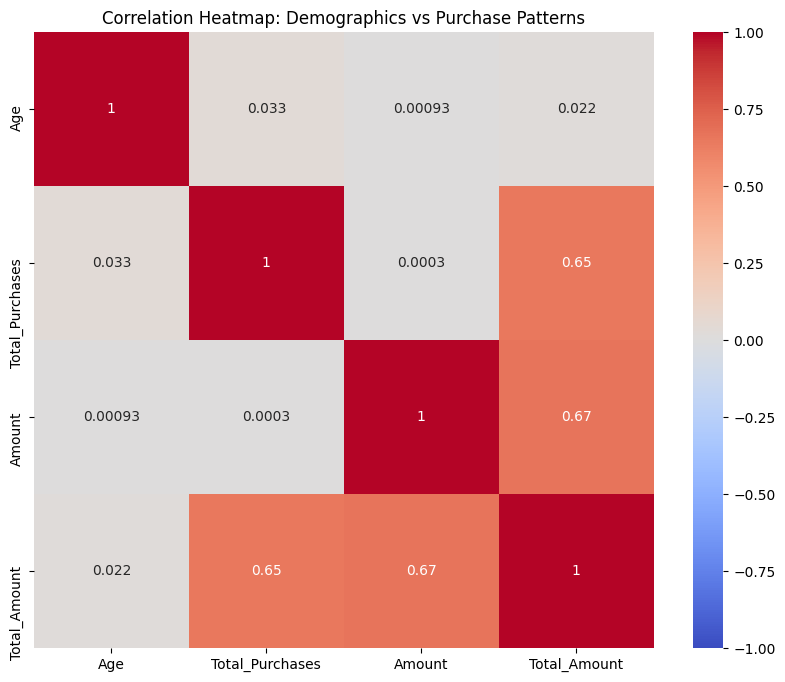

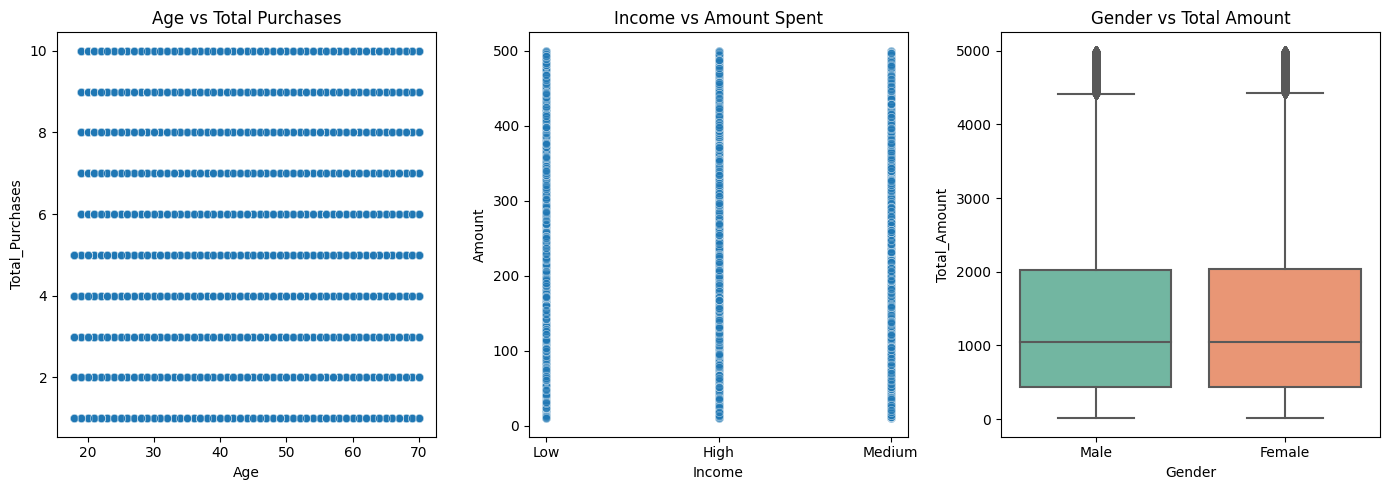

In [28]:
# Select relevant columns for analysis
demographics_and_purchases = df[['Age', 'Gender', 'Income', 'City', 'State', 'Country', 
                                 'Total_Purchases', 'Amount', 'Total_Amount']]

# Correlation matrix between demographics and purchase patterns
correlation_matrix = demographics_and_purchases.corr()

# Visualization - Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Demographics vs Purchase Patterns')
plt.show()

# Scatter plots for specific relationships
plt.figure(figsize=(14, 5))

# Scatter plot: Age vs Total_Purchases
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Total_Purchases', data=demographics_and_purchases, alpha=0.5)
plt.title('Age vs Total Purchases')

# Scatter plot: Income vs Amount Spent
plt.subplot(1, 3, 2)
sns.scatterplot(x='Income', y='Amount', data=demographics_and_purchases, alpha=0.5)
plt.title('Income vs Amount Spent')

# Scatter plot: Gender vs Total Amount
plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Total_Amount', data=demographics_and_purchases, palette='Set2')
plt.title('Gender vs Total Amount')

plt.tight_layout()
plt.show()


### Product Analysis

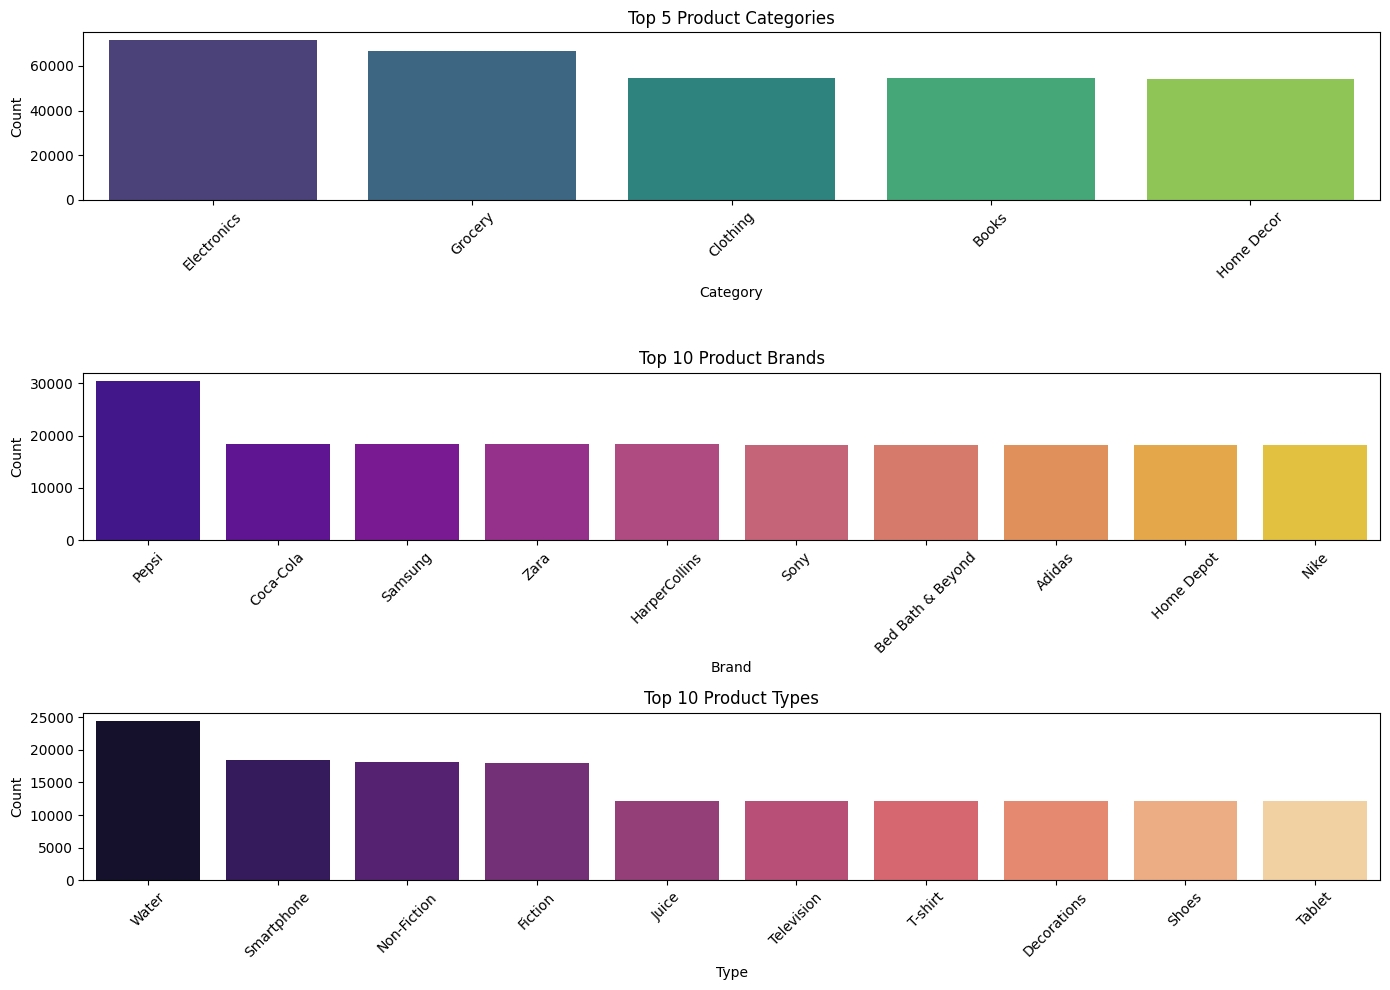

Top Product Categories:
Electronics    71460
Grocery        66764
Clothing       54723
Books          54606
Home Decor     54364
Name: Product_Category, dtype: int64

Top Product Brands:
Pepsi                30564
Coca-Cola            18385
Samsung              18367
Zara                 18364
HarperCollins        18347
Sony                 18312
Bed Bath & Beyond    18238
Adidas               18232
Home Depot           18142
Nike                 18133
Name: Product_Brand, dtype: int64

Top Product Types:
Water          24456
Smartphone     18458
Non-Fiction    18169
Fiction        18040
Juice          12224
Television     12196
T-shirt        12178
Decorations    12171
Shoes          12137
Tablet         12087
Name: Product_Type, dtype: int64


In [29]:
# Select relevant columns for analysis
product_data = df[['Product_Category', 'Product_Brand', 'Product_Type']]

# Count occurrences of each category, brand, and type
category_counts = product_data['Product_Category'].value_counts()
brand_counts = product_data['Product_Brand'].value_counts()
type_counts = product_data['Product_Type'].value_counts()

# Visualization - Bar plots for top categories, brands, and types
plt.figure(figsize=(14, 10))

# Top Product Categories
plt.subplot(3, 1, 1)
sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette='viridis')
plt.title('Top 5 Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Top Product Brands
plt.subplot(3, 1, 2)
sns.barplot(x=brand_counts.index[:10], y=brand_counts.values[:10], palette='plasma')
plt.title('Top 10 Product Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Top Product Types
plt.subplot(3, 1, 3)
sns.barplot(x=type_counts.index[:10], y=type_counts.values[:10], palette='magma')
plt.title('Top 10 Product Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Display counts for each category, brand, and type
print("Top Product Categories:")
print(category_counts.head(10))
print("\nTop Product Brands:")
print(brand_counts.head(10))
print("\nTop Product Types:")
print(type_counts.head(10))


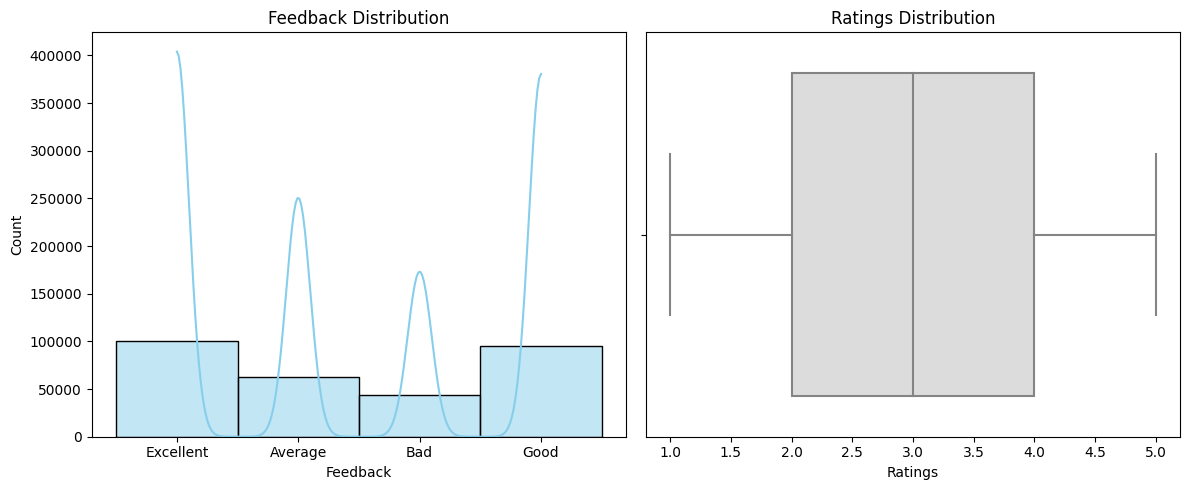

Summary Statistics for Feedback:
count        301917
unique            4
top       Excellent
freq         100920
Name: Feedback, dtype: object

Summary Statistics for Ratings:
count    301917.000000
mean          3.162697
std           1.320454
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Ratings, dtype: float64


In [30]:
# Select relevant columns for analysis
feedback_ratings = df[['Feedback', 'Ratings']]

# Summary statistics for feedback and ratings
feedback_stats = feedback_ratings['Feedback'].describe()
ratings_stats = feedback_ratings['Ratings'].describe()

# Visualization
plt.figure(figsize=(12, 5))

# Histogram of Feedback
plt.subplot(1, 2, 1)
sns.histplot(feedback_ratings['Feedback'], bins=10, kde=True, color='skyblue')
plt.title('Feedback Distribution')
plt.xlabel('Feedback')
plt.ylabel('Count')

# Boxplot of Ratings
plt.subplot(1, 2, 2)
sns.boxplot(x=feedback_ratings['Ratings'], palette='coolwarm')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')

plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary Statistics for Feedback:")
print(feedback_stats)
print("\nSummary Statistics for Ratings:")
print(ratings_stats)


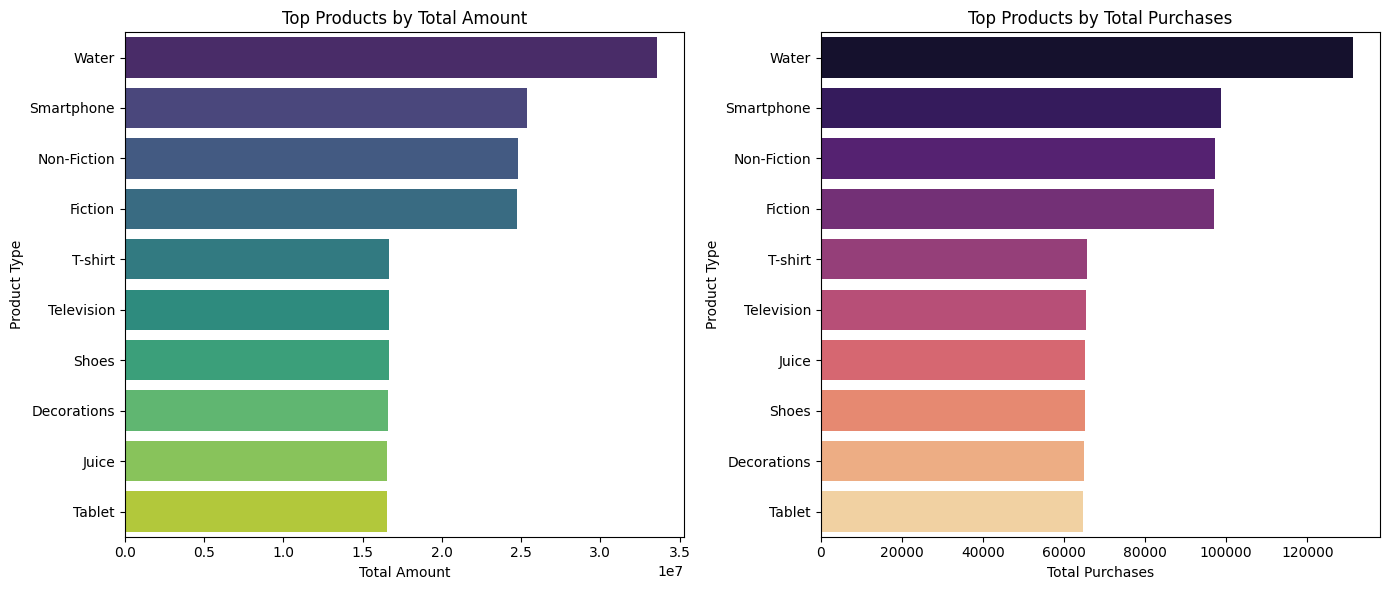

Top Products by Total Amount:
Product_Type
Water          3.359351e+07
Smartphone     2.539438e+07
Non-Fiction    2.479063e+07
Fiction        2.476738e+07
T-shirt        1.669518e+07
Television     1.668257e+07
Shoes          1.667897e+07
Decorations    1.660824e+07
Juice          1.655717e+07
Tablet         1.653055e+07
Name: Total_Amount, dtype: float64

Top Products by Total Purchases:
Product_Type
Water          131362
Smartphone      98706
Non-Fiction     97251
Fiction         96931
T-shirt         65606
Television      65474
Juice           65272
Shoes           65207
Decorations     65002
Tablet          64662
Name: Total_Purchases, dtype: int32


In [31]:
# Analyze products contributing to Total_Amount and Total_Purchases
product_contribution_amount = df.groupby('Product_Type')['Total_Amount'].sum().sort_values(ascending=False).head(10)
product_contribution_purchases = df.groupby('Product_Type')['Total_Purchases'].sum().sort_values(ascending=False).head(10)

# Visualization - Bar plots for top contributing products
plt.figure(figsize=(14, 6))

# Top Products by Total Amount
plt.subplot(1, 2, 1)
sns.barplot(x=product_contribution_amount.values, y=product_contribution_amount.index, palette='viridis')
plt.title('Top Products by Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Product Type')

# Top Products by Total Purchases
plt.subplot(1, 2, 2)
sns.barplot(x=product_contribution_purchases.values, y=product_contribution_purchases.index, palette='magma')
plt.title('Top Products by Total Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Product Type')

plt.tight_layout()
plt.show()

# Display top contributing products
print("Top Products by Total Amount:")
print(product_contribution_amount)
print("\nTop Products by Total Purchases:")
print(product_contribution_purchases)


Best Performing Product:
Product_Type          Water
Total_Amount    3.35935e+07
Ratings             3.29794
Name: 32, dtype: object


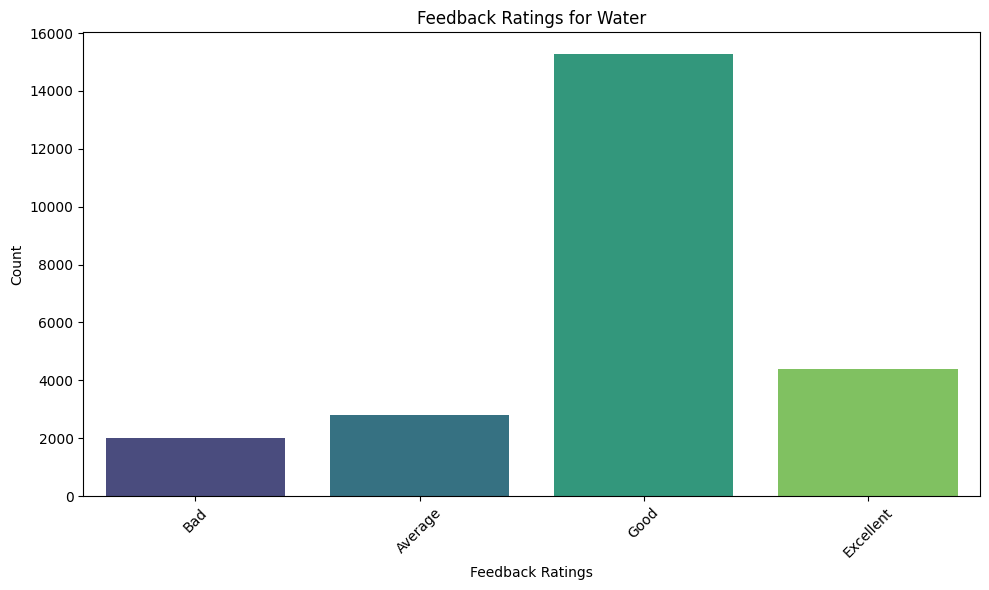

In [32]:
# Group by 'Product_Type' and calculate total sales ('Total_Amount') and average 'Ratings'
product_performance = df.groupby('Product_Type').agg({
    'Total_Amount': 'sum',            # Total sales for each product type
    'Ratings': 'mean'                 # Average ratings for each product type
}).reset_index()

# Find the product with the highest total sales
best_product = product_performance.loc[product_performance['Total_Amount'].idxmax()]

# Define colors for each feedback category
colors = {'Bad': 'red', 'Average': 'orange', 'Good': 'green', 'Excellent': 'blue'}

# Print the best performing product
print("Best Performing Product:")
print(best_product)

# Filter data for the best performing product
best_product_name = best_product['Product_Type']
best_product_feedback = df[df['Product_Type'] == best_product_name]

# Plotting the feedback ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Feedback', data=best_product_feedback, palette='viridis')
plt.title(f'Feedback Ratings for {best_product_name}')
plt.xlabel('Feedback Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The Best Performing Product 
- Water is the best performing product according to sales with a positive feedback of "Good" and "Excellent" dominating. 

Best Performing Brand:
Product_Brand          Pepsi
Total_Amount     4.17844e+07
Ratings              3.26954
Name: 12, dtype: object


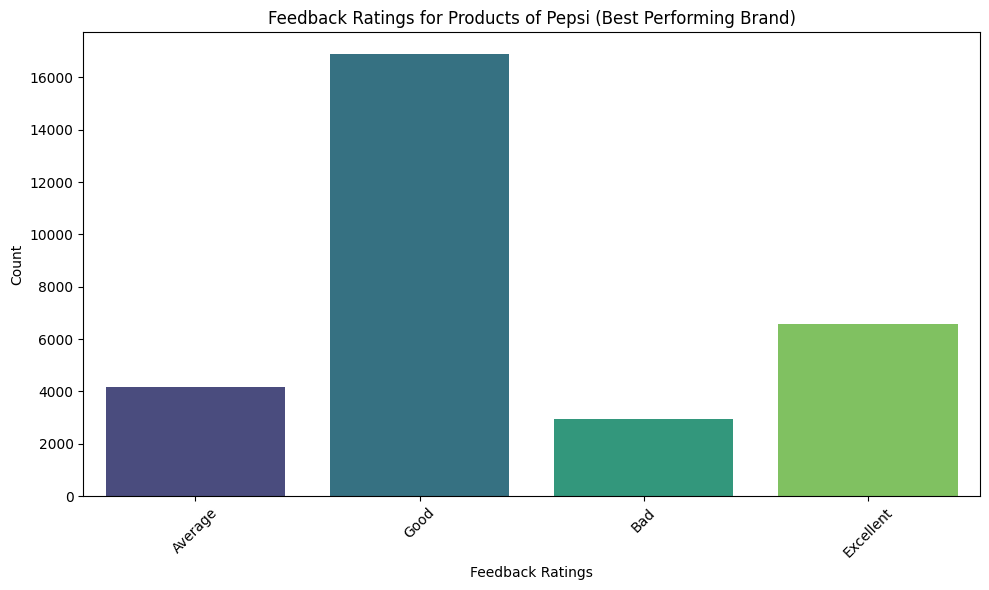

In [33]:
# Group by 'Product_Brand' and calculate total sales ('Total_Amount') and average 'Ratings'
brand_performance = df.groupby('Product_Brand').agg({
    'Total_Amount': 'sum',            # Total sales for each product brand
    'Ratings': 'mean'                 # Average ratings for each product brand
}).reset_index()

# Find the brand with the highest total sales
best_brand = brand_performance.loc[brand_performance['Total_Amount'].idxmax()]

# Print the best performing brand
print("Best Performing Brand:")
print(best_brand)

# Filter data for the best performing brand
best_brand_name = best_brand['Product_Brand']
best_brand_feedback = df[df['Product_Brand'] == best_brand_name]

# Plotting the feedback ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Feedback', data=best_brand_feedback, palette='viridis')
plt.title(f'Feedback Ratings for Products of {best_brand_name} (Best Performing Brand)')
plt.xlabel('Feedback Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Best Perfoming Brand
- Pepsi was the best performing brand with "Good" on most of the feedback.

Least Performing Product: BlueStar AC
Total Sales: 3072748.6732987305
Total Purchases: 12018


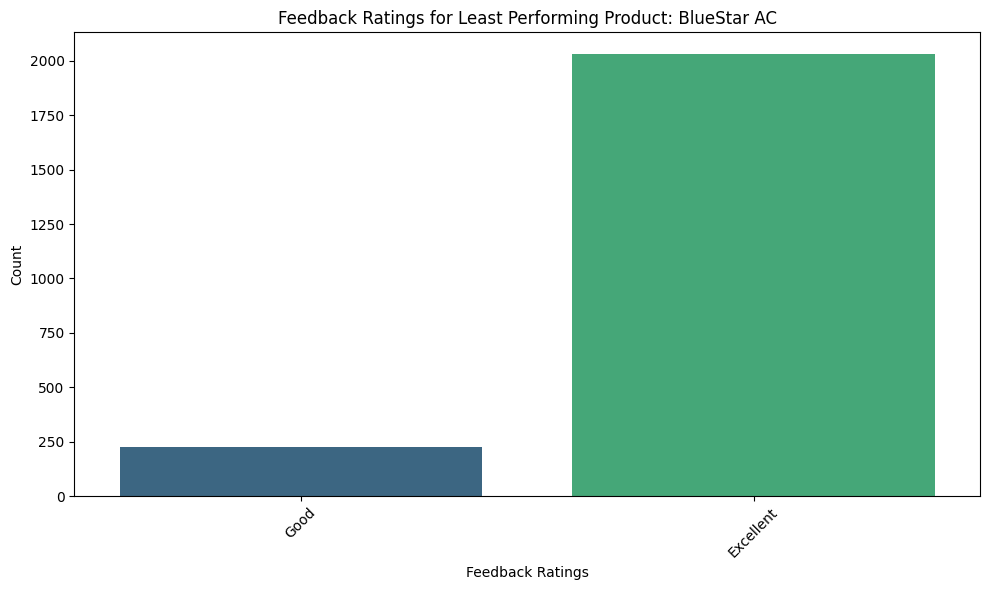

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Product_Type' and calculate total sales ('Total_Amount'), number of sales ('Total_Purchases'), and average 'Ratings'
product_performance = df.groupby('Product_Type').agg({
    'Total_Amount': 'sum',            # Total sales for each product type
    'Total_Purchases': 'sum',         # Total number of purchases for each product type
    'Ratings': 'mean'                 # Average ratings for each product type
}).reset_index()

# Find the product with the lowest total sales
worst_product = product_performance.loc[product_performance['Total_Amount'].idxmin()]

# Print the worst performing product and its metrics
worst_product_name = worst_product['Product_Type']
worst_product_total_sales = worst_product['Total_Amount']
worst_product_total_purchases = worst_product['Total_Purchases']
print(f"Least Performing Product: {worst_product_name}")
print(f"Total Sales: {worst_product_total_sales}")
print(f"Total Purchases: {worst_product_total_purchases}")

# Filter data for the worst performing product
worst_product_feedback = df[df['Product_Type'] == worst_product_name]

# Plotting the feedback ratings for the worst performing product
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Feedback', data=worst_product_feedback, palette='viridis')
plt.title(f'Feedback Ratings for Least Performing Product: {worst_product_name}')
plt.xlabel('Feedback Ratings')
plt.ylabel('Count')

# Annotate total sales and total purchases on the plot
#plt.text(0.5, 0.95, f'Total Sales: ${worst_product_total_sales:.2f}', horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes, fontsize=12)
#plt.text(0.5, 0.90, f'Total Purchases: {worst_product_total_purchases}', horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes, fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Least Performing Brand and Product
- The Least amount of sales from the retail data.
- Despite the least amount number of sales this product doesnt have any "Bad" or "Average" Feedback.

### Sales and Revenue Trends

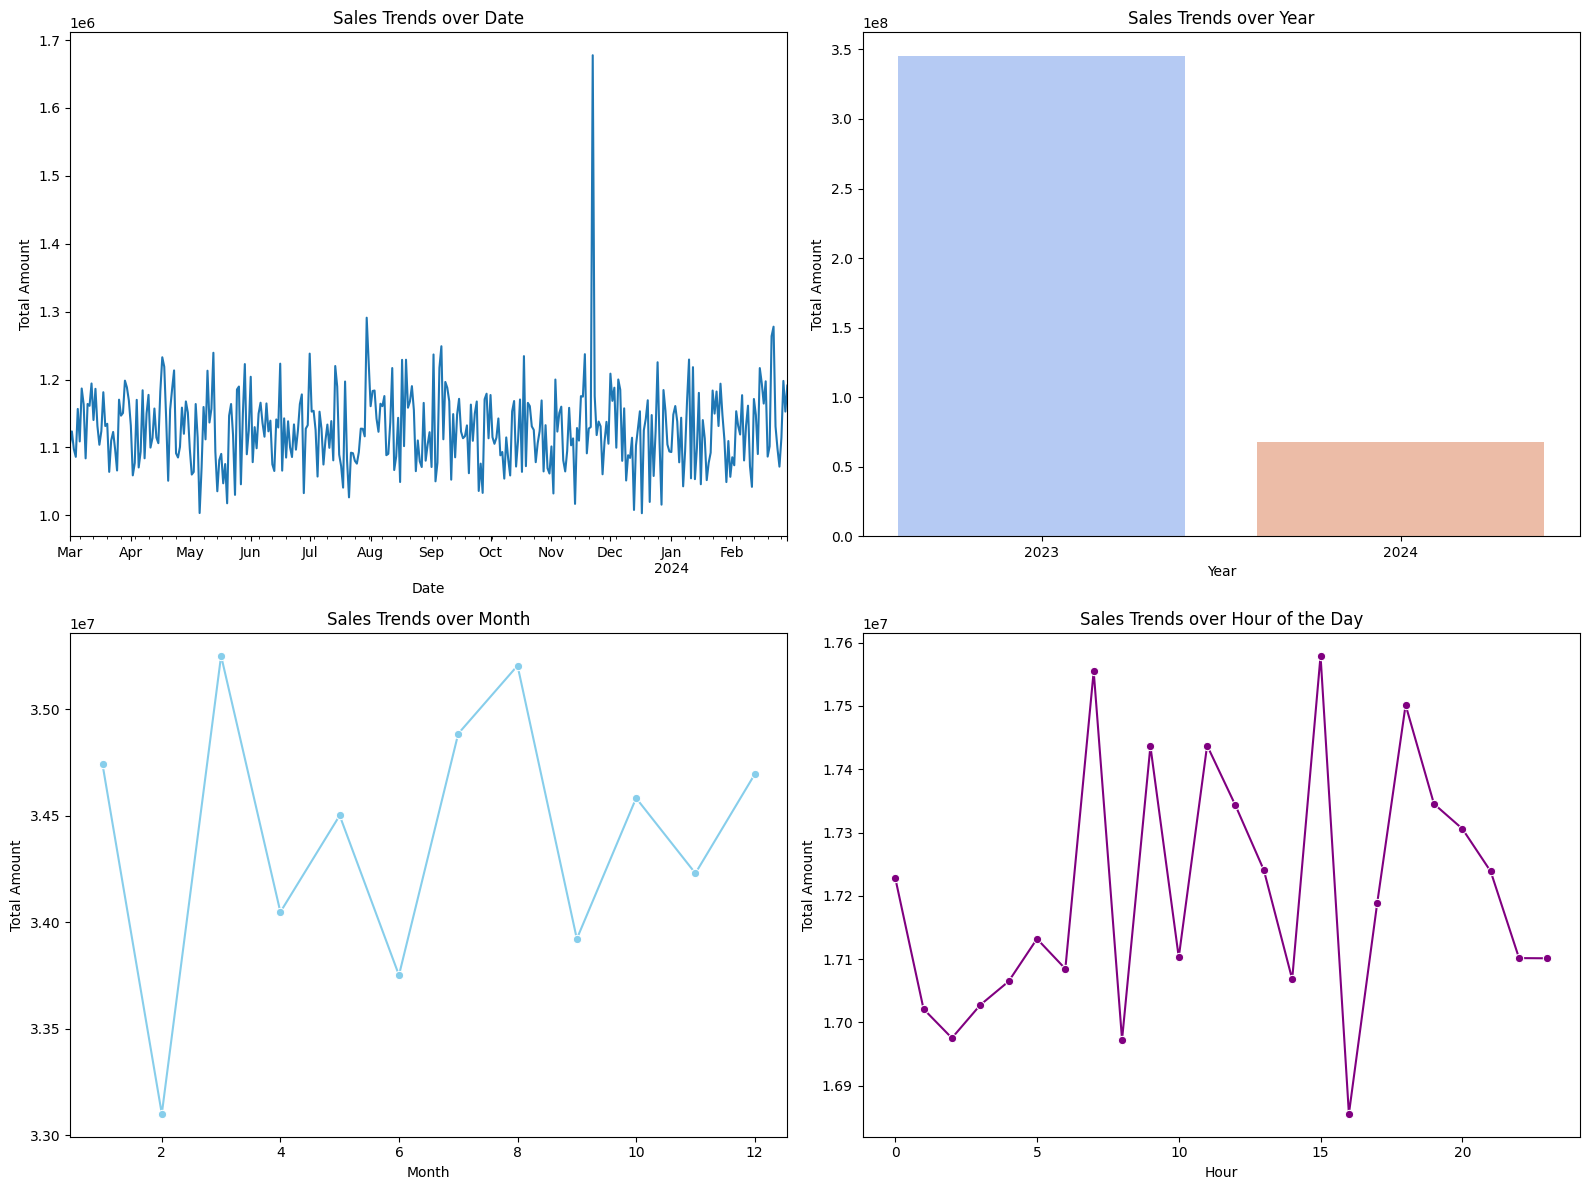

In [35]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, and Time components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# Aggregate sales data over time
sales_by_date = df.groupby('Date')['Total_Amount'].sum()
sales_by_year = df.groupby('Year')['Total_Amount'].sum()
sales_by_month = df.groupby('Month')['Total_Amount'].sum()
sales_by_hour = df.groupby('Hour')['Total_Amount'].sum()

# Visualization - Line plots for sales trends
plt.figure(figsize=(16, 12))

# Sales trends over Date
plt.subplot(2, 2, 1)
sales_by_date.plot(ax=plt.gca())
plt.title('Sales Trends over Date')
plt.xlabel('Date')
plt.ylabel('Total Amount')

# Sales trends over Year
plt.subplot(2, 2, 2)
sns.barplot(x=sales_by_year.index, y=sales_by_year.values, palette='coolwarm')
plt.title('Sales Trends over Year')
plt.xlabel('Year')
plt.ylabel('Total Amount')

# Sales trends over Month
plt.subplot(2, 2, 3)
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker='o', color='skyblue')
plt.title('Sales Trends over Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')

# Sales trends over Hour of the day
plt.subplot(2, 2, 4)
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker='o', color='purple')
plt.title('Sales Trends over Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()


- Number of Sales is significantly bigger in 2023 than 2024, which could indicate that the data from 2024 is not yet complete.
- Sales Trend over date had a big spike in late november, might be because Christmas is coming.
- Sales Trend over Hour shows that 7am and 4pm is the peak hour.

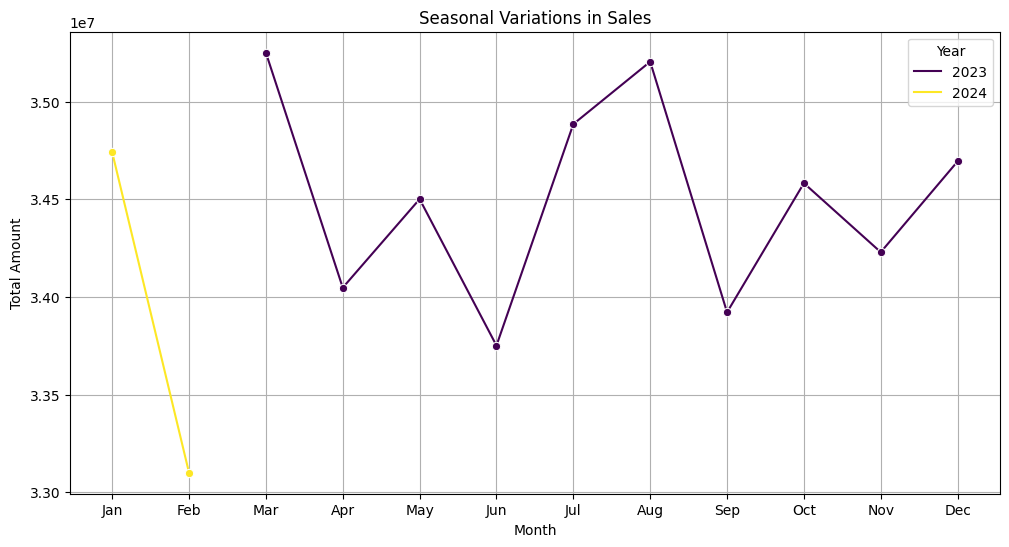

In [36]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month and Year for seasonal analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Aggregate sales data by Month and Year
monthly_sales = df.groupby(['Year', 'Month'])['Total_Amount'].sum().reset_index()

# Visualization - Line plot for seasonal variations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Amount', hue='Year', data=monthly_sales, palette='viridis', marker='o')
plt.title('Seasonal Variations in Sales')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()


In [37]:
# Calculate total revenue (Total_Amount)
total_revenue = df['Total_Amount'].sum()

# Calculate average transaction amount (Amount)
average_transaction_amount = df['Amount'].mean()

# Display results
print(f"Total Revenue (Total_Amount): ${total_revenue:.2f}")
print(f"Average Transaction Amount (Amount): ${average_transaction_amount:.2f}")


Total Revenue (Total_Amount): $412908447.64
Average Transaction Amount (Amount): $255.16


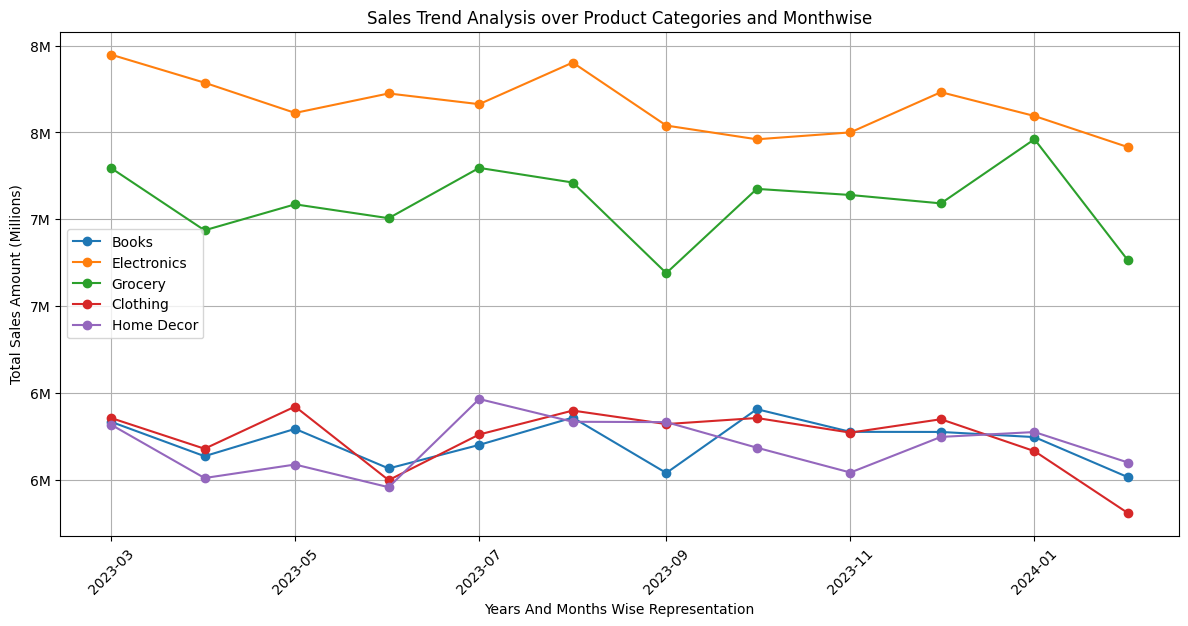

In [38]:
sales_trend = pd.DataFrame(df)
# Create a 'Date' column
sales_trend['Date'] = sales_trend['Year'].astype(str) + '-' + sales_trend['Month'].astype(str).str.zfill(2)

# Group by Product_Category and Date, sum Total_Amount
sales_trend = sales_trend.groupby(['Product_Category', 'Date'])['Total_Amount'].sum().reset_index()

# Convert Date column to datetime format for proper sorting
sales_trend['Date'] = pd.to_datetime(sales_trend['Date'])

# Sort by Date to ensure the line plot connects points in chronological order
sales_trend.sort_values(by='Date', inplace=True)

# Plotting with Matplotlib
plt.figure(figsize=(12, 6))

# Loop through each Product_Category
for category in sales_trend['Product_Category'].unique():
    category_data = sales_trend[sales_trend['Product_Category'] == category]
    plt.plot(category_data['Date'], category_data['Total_Amount'] / 1000000, label=category, marker='o')

plt.xlabel('Years And Months Wise Representation')
plt.ylabel('Total Sales Amount (Millions)')
plt.title('Sales Trend Analysis over Product Categories and Monthwise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + "M"))

plt.show()

- Electronic was the best performing product categories with number 1 in sales followed by Grocery, Clothing, Books and Home Decor.


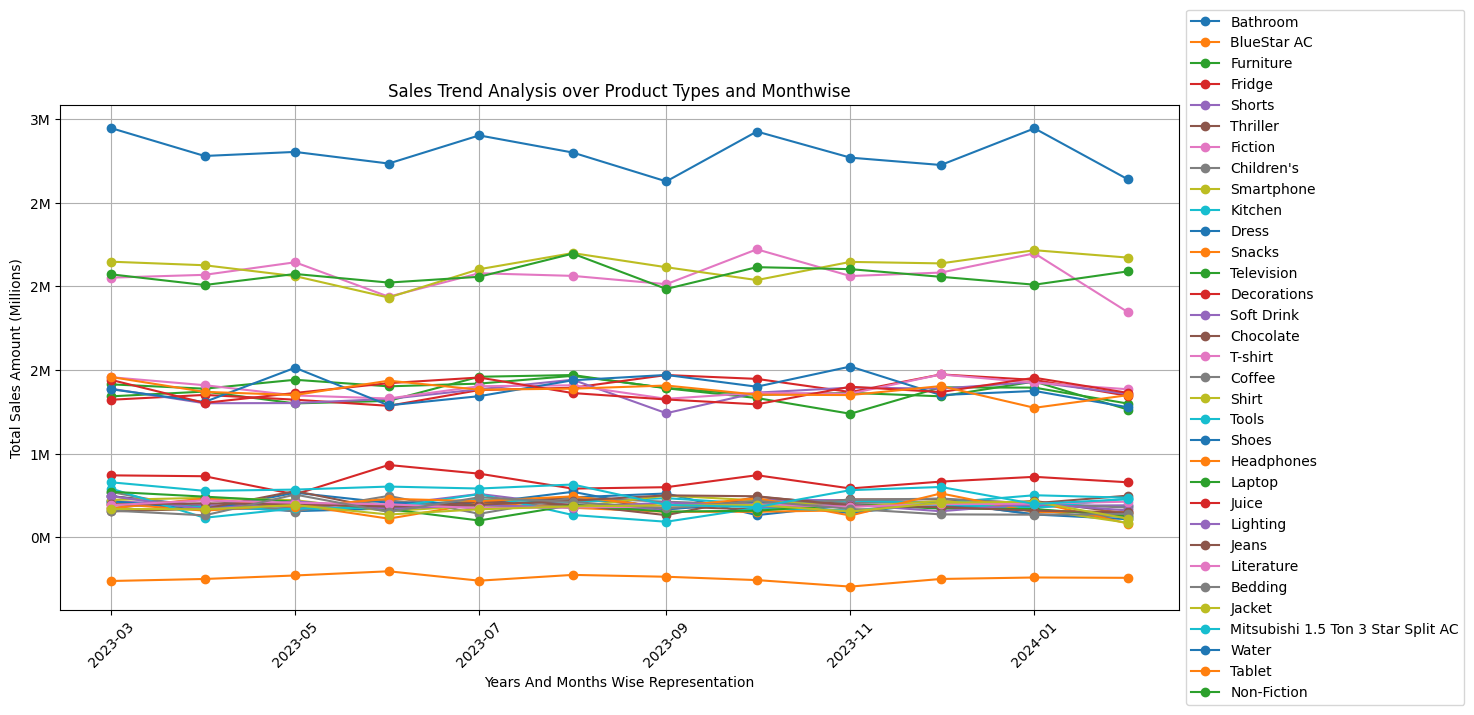

In [39]:
sales_trend = pd.DataFrame(df)

# Creating a 'Date' column by combining Year and Month
sales_trend['Date'] = sales_trend['Year'].astype(str) + '-' + sales_trend['Month'].astype(str).str.zfill(2)

# Group by Product_Type and Date, sum Total_Amount
sales_trend = sales_trend.groupby(['Product_Type', 'Date'])['Total_Amount'].sum().reset_index()

# Convert Date column to datetime format for proper sorting
sales_trend['Date'] = pd.to_datetime(sales_trend['Date'])

# Sort by Date to ensure the line plot connects points in chronological order
sales_trend.sort_values(by='Date', inplace=True)

# Plotting with Matplotlib
plt.figure(figsize=(12, 6))

# Loop through each Product_Type
for product_type in sales_trend['Product_Type'].unique():
    product_data = sales_trend[sales_trend['Product_Type'] == product_type]
    plt.plot(product_data['Date'], product_data['Total_Amount'] / 1000000, label=product_type, marker='o')

plt.xlabel('Years And Months Wise Representation')
plt.ylabel('Total Sales Amount (Millions)')
plt.title('Sales Trend Analysis over Product Types and Monthwise')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x) + "M"))

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

- Water is the best performing product with number 1 in sales


### Customer Engagement and Satisfaction

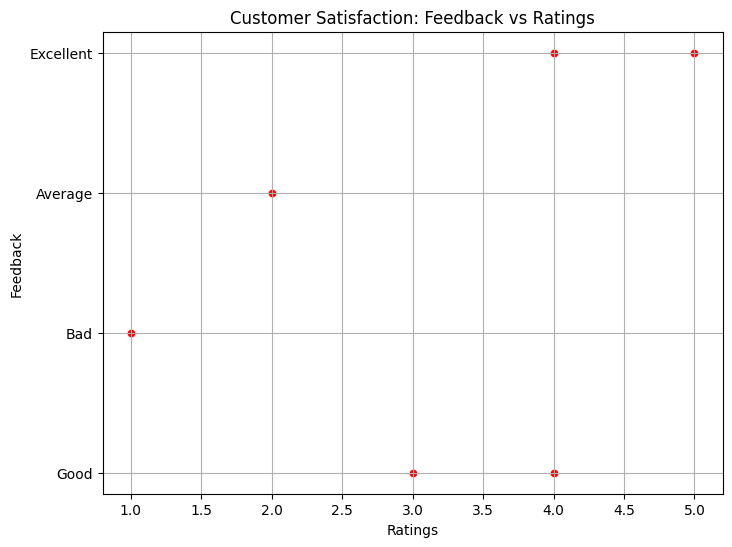

KeyError: 'Feedback'

In [50]:
df = pd.read_csv("data_penjualan_retail.csv")
# Select relevant columns for analysis
feedback_ratings = df[['Feedback', 'Ratings']]

# Visualization - Jointplot for Feedback vs Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratings', y='Feedback', data=feedback_ratings, color='red')
plt.title('Customer Satisfaction: Feedback vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('Feedback')
plt.grid(True)
plt.show()

# Assess correlation between Feedback and Ratings
correlation = feedback_ratings.corr().loc['Ratings', 'Feedback']

# Display correlation coefficient
print(f"Correlation between Feedback and Ratings: {correlation:.2f}")


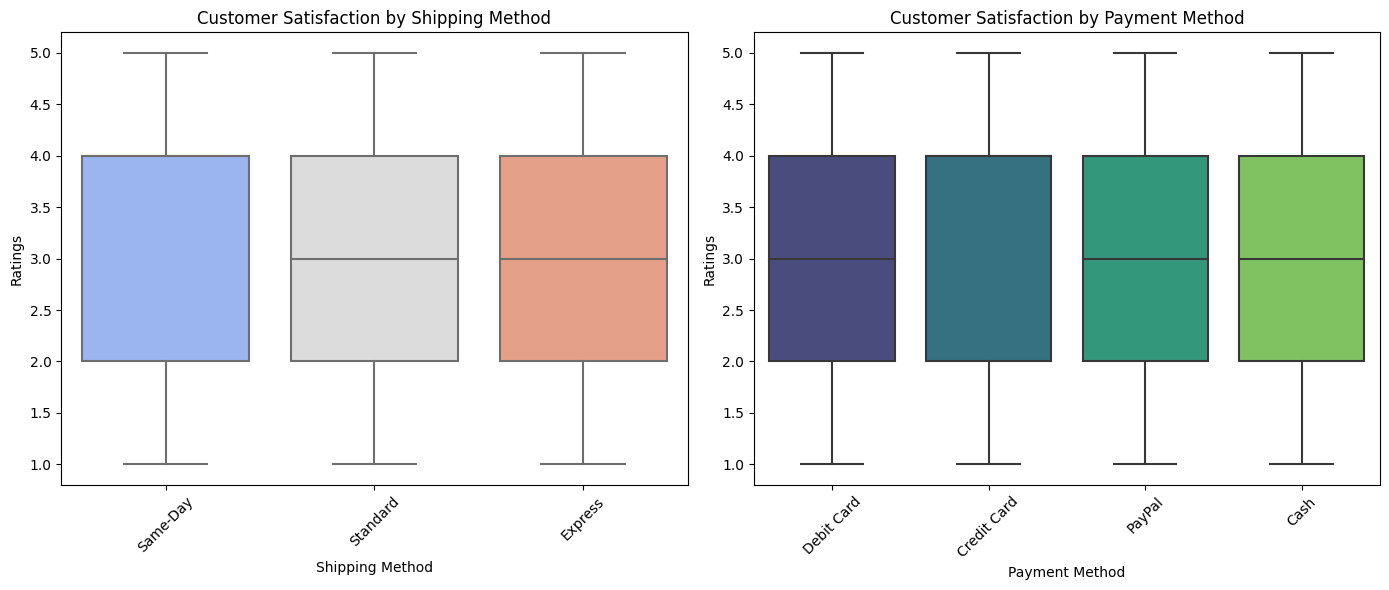

Average Ratings by Shipping Method:
Shipping_Method
Express     3.144262
Same-Day    3.199704
Standard    3.142187
Name: Ratings, dtype: float64

Average Ratings by Payment Method:
Payment_Method
Cash           3.194810
Credit Card    3.230506
Debit Card     3.065703
PayPal         3.145590
Name: Ratings, dtype: float64


In [46]:
df['Feedback'] = pd.to_numeric(df['Feedback'], errors='coerce')

# Boxplot to visualize Ratings by Shipping_Method
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Shipping_Method', y='Ratings', data=df, palette='coolwarm')
plt.title('Customer Satisfaction by Shipping Method')
plt.xlabel('Shipping Method')
plt.ylabel('Ratings')
plt.xticks(rotation=45)

# Boxplot to visualize Ratings by Payment_Method
plt.subplot(1, 2, 2)
sns.boxplot(x='Payment_Method', y='Ratings', data=df, palette='viridis')
plt.title('Customer Satisfaction by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Ratings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistical Summary: Ratings by Shipping_Method and Payment_Method
ratings_by_shipping = df.groupby('Shipping_Method')['Ratings'].mean()
ratings_by_payment = df.groupby('Payment_Method')['Ratings'].mean()

print("Average Ratings by Shipping Method:")
print(ratings_by_shipping)
print("\nAverage Ratings by Payment Method:")
print(ratings_by_payment)



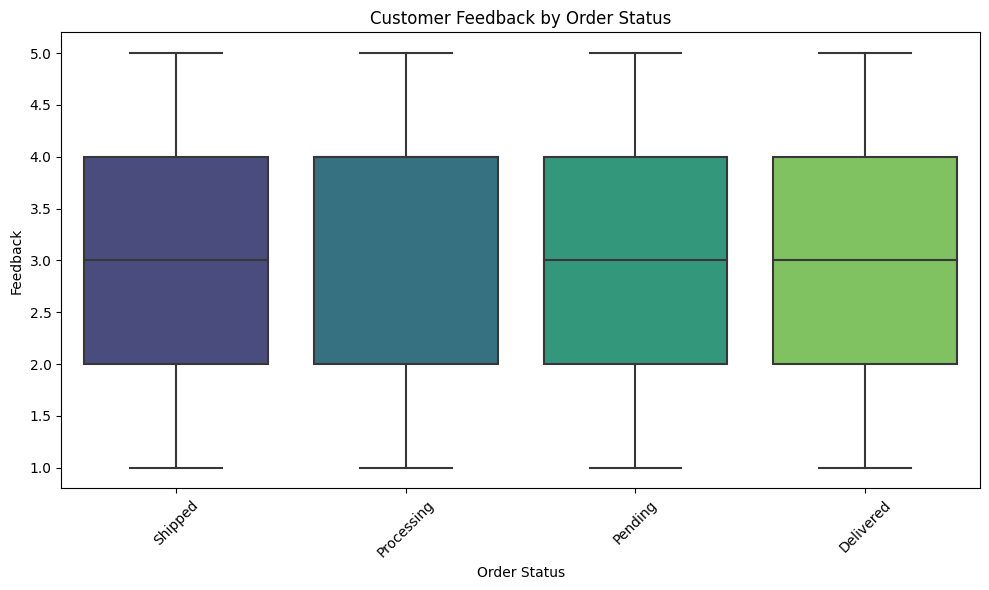

Average Feedback by Order Status:
Order_Status
Delivered     3.157380
Pending       3.051506
Processing    3.247800
Shipped       3.182635
Name: Ratings, dtype: float64


In [48]:
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')

# Boxplot to visualize Feedback by Order_Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Order_Status', y='Ratings', data=df, palette='viridis')
plt.title('Customer Feedback by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Feedback')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistical Summary: Feedback by Order_Status
feedback_by_status = df.groupby('Order_Status')['Ratings'].mean()
print("Average Feedback by Order Status:")
print(feedback_by_status)


### Machine Learning: Predicting Next Months Sales.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Load data
df = pd.read_csv('data_penjualan_retail.csv')

# Data preprocessing and feature engineering
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Quarter'] = df['Date'].dt.quarter

# Aggregate sales data
data_agg = df.groupby(['Year', 'Month']).agg({
    'Total_Amount': 'sum',
    'Total_Purchases': 'sum',
}).reset_index()

# Create lag features
data_agg['Lag1_Total_Amount'] = data_agg['Total_Amount'].shift(1)
data_agg['Lag1_Total_Purchases'] = data_agg['Total_Purchases'].shift(1)
data_agg.dropna(inplace=True)

# Transform target variable if skewed
data_agg['Total_Amount'] = np.log1p(data_agg['Total_Amount'])

# Prepare features and target variable
X = data_agg[['Year', 'Month', 'Total_Purchases', 'Lag1_Total_Amount', 'Lag1_Total_Purchases']]
y = data_agg['Total_Amount']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Define preprocessing steps (scaling numerical variables)
preprocessor = StandardScaler()

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 6, 9],
    'regressor__learning_rate': [0.01, 0.1, 0.3]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example: Predict sales for next month
next_month_data = pd.DataFrame({
    'Year': [2024],  # Adjust year and month accordingly
    'Month': [7],
    'Total_Purchases': [1000],  # Example values, replace with actual forecasted values
    'Lag1_Total_Amount': [X_test.iloc[-1]['Total_Purchases']],  # Use the last known values for lags
    'Lag1_Total_Purchases': [X_test.iloc[-1]['Lag1_Total_Purchases']]
})

next_month_prediction = best_model.predict(next_month_data)
# Transform back if log transformation was applied
next_month_prediction = np.expm1(next_month_prediction)

print(f"Predicted sales for next month: {next_month_prediction[0]}")


Summary
- MSE: The very low MSE suggests the model's predictions are very close to the actual values on - average, which is a positive sign.
- R²: An R² of 0.693 indicate the model explains a significant portion of the variance in the target variable.
- Prediction: The predicted sales figure should be validated against business expectations or historical data for practical relevance.
- 33.746.100,00 of sales were predicted.

### Why we need to predict next month sales?

- Inventory Management: Helps maintain optimal stock levels, avoiding overstocking or stockouts, and ensures timely supplier coordination.
- Financial Planning: Essential for accurate revenue forecasting, budgeting, and managing cash flow.
- Marketing and Sales Strategies: Aids in planning campaigns and allocating resources efficiently to match expected demand.
- Staffing and Resource Allocation: Ensures appropriate staffing and efficient use of resources based on anticipated sales volumes.
- Strategic Decision Making: Supports informed decision-making, risk management, and helps identify market trends and growth opportunities.
- Customer Satisfaction: Maintains high service levels and enables personalized offers to meet customer demand.
- Competitive Advantage: Allows quicker response to market changes and better market positioning.

### Machine Learning: Predicting Churn Customer.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define mapping for 'Feedback' categories to numerical values
feedback_mapping = {
    'Bad': 1,
    'Average': 2,
    'Good': 3,
    'Excellent': 4
}
# Map 'Feedback' column to numerical values
df['Feedback'] = df['Feedback'].map(feedback_mapping)
# Example: Feature engineering and churn labeling
# Define mapping for 'Feedback' categories to numerical values
order_status_mapping = {
    'Pending': 1,
    'Processing': 2,
    'Shipped': 3,
    'Delivered': 4
} 
# Map 'Feedback' column to numerical values
df['Order_Status'] = df['Order_Status'].map(order_status_mapping)
# Create features aggregated by Customer_ID
customer_features = df.groupby('Customer_ID').agg({
    'Total_Purchases': 'sum',
    'Total_Amount': 'sum',
    'Ratings': 'mean',
    'Date': lambda x: (pd.Timestamp.now() - pd.to_datetime(x.max())).days,  # Recency feature
    'Feedback': lambda x: x.value_counts().index[0],  # Example of a categorical feature
    'Order_Status': lambda x: x.value_counts().index[0]  # Another categorical feature
}).reset_index()

# Define churn based on a criterion (e.g., no purchases in the last 6 months)
current_date = pd.Timestamp.now()
customer_features['Churn'] = customer_features['Date'].apply(lambda x: 1 if x > 60 else 0)

# Select features and target variable
X = customer_features.drop(['Customer_ID', 'Churn'], axis=1)
y = customer_features['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Training a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict churn for new data (customers)
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print(classification_report(y_test, predictions))


Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     17354

    accuracy                           1.00     17354
   macro avg       1.00      1.00      1.00     17354
weighted avg       1.00      1.00      1.00     17354



Summary
- Accuracy: 1.0, which means the model made correct predictions for all instances in dataset.
- Precision: being 1.00 (or 100%) for both classes (0 and 1) indicates that all predicted instances labeled as 0 or 1 were indeed correct.
- F1-score: being 1.00 for both classes indicates a perfect balance between precision and recall, reflecting high accuracy in both identifying positive instances correctly and avoiding false positives.
- Customer will likely not to Churn considering the number from the machine learning and this is a retail store that they will definitely come back.